<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/master/live_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import os
import numpy as np
import matplotlib.pyplot as plt

In [43]:
live_web_contents = lambda row: [x.text.replace('\n', '') for x in row]
SHORT_HEADERS=['SNO','State','Indian-Confirmed','Foreigners-Confirmed','Cured','Deaths']
URL='https://www.mohfw.gov.in/'

response_status=requests.get(URL)
print(response_status)
response=requests.get(URL).content
print(response)

<Response [200]>
b'<!doctype html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\r\n<title>Ministry of Health and Family Welfare | GOI RSS</title>\r\n<link rel="shortcut icon" href="assets/images/favicon.ico" />\r\n  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.1/css/bootstrap.min.css">\r\n  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.1/jquery.min.js"></script>\r\n  <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.4.1/js/bootstrap.min.js"></script>\r\n<link rel="stylesheet" href="assets/css/font-awesome.min.css" type="text/css">\r\n<link href="https://fonts.googleapis.com/css?family=Poppins:300,400,500,600,700" rel="stylesheet">\r\n<link rel="stylesheet" href="assets/css/common.css" type="text/css">\r\n<link rel="stylesheet" href="assets/css/style.css" type="text/css">\r\n\r\n<!--[if lt IE 9]>\r\n\t\t<script type="text/javascript" src="assets/js/

In [44]:
soup = BeautifulSoup(response, 'html.parser') #all information from web-sites in form of html-tags
header = live_web_contents(soup.tr.find_all('th'))
print(header)

['Date', 'TITLE']


In [0]:
stats = [] 
all_rows = soup.find_all('tr')#for tabular-rows from web-sites

In [0]:
for row in all_rows: 
    stat = live_web_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 5: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 6: 
            stats.append(stat) 
  
stats[-1][1] = "Total Cases"
  
stats.remove(stats[-1])

  SNO  State                          Indian-Confirmed    Foreigners-Confirmed    Cured    Deaths
-----  ---------------------------  ------------------  ----------------------  -------  --------
    1  Andaman and Nicobar Islands                   1                       0        0         0
    2  Andhra Pradesh                               12                       0        1         0
    3  Bihar                                         6                       0        0         1
    4  Chandigarh                                    7                       0        0         0
    5  Chhattisgarh                                  6                       0        0         0
    6  Delhi                                        35                       1        6         1
    7  Goa                                           3                       0        0         0
    8  Gujarat                                      42                       1        0         3
    9  Haryana      

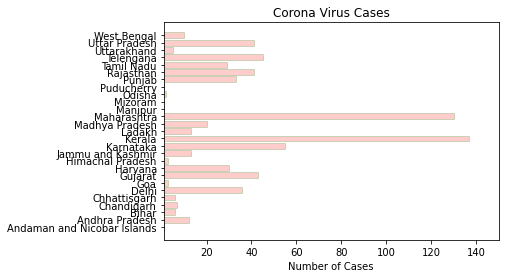

In [47]:

objects = [] 
for row in stats : 
    objects.append(row[1])  
  
y_pos = np.arange(len(objects)) 
  
performance = [] 
for row in stats : 
    performance.append(int(row[2]) + int(row[3])) 
  
table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 


plt.barh(y_pos, performance, align='center', alpha=0.2, 
                 color='red', edgecolor='green') 
  
plt.yticks(y_pos, objects) 
plt.xlim(1,150) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 